In [2]:
#!/usr/bin/env python
# coding: utf-8


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy import units as u
import sys
#import pynbody
#import healpy as hp
#from healpy.newvisufunc import projview, newprojplot

sys.path.append("../scripts/src/")

sys.path.append("/mnt/home/ecunningham/python")
plt.style.use('~/matplotlib.mplstyle')
import gizmo_analysis as ga
import halo_analysis as halo
#import nba

# 
#import pynbody_routines as pr 
import io_gizmo_pynbody as fa
#import plotting as pl

from scipy.linalg import norm
import h5py

In [3]:
plt.rcParams['text.usetex'] = False

In [3]:
#adopted from jsamu/sappy/kinematics
def orbital_pole_dispersion(pos, vel):
    '''
    Calculate the angular dispersion [deg] of satellite orbital poles around
    their mean orbital pole.
    '''
    j_vec = np.array([np.cross(x,v)/np.linalg.norm(np.cross(x,v)) for x, v in zip(pos, vel)])
    #j_mag = norm(j_vec, axis=1)
    #j_vec = orbital_ang_momentum(hal, hal_mask, host_str=host_str, norm=True)
    avg_j_vec = np.nanmean(j_vec, axis=0, dtype=np.float64)/np.linalg.norm(np.nanmean(j_vec, axis=0))
    #print(np.linalg.norm(np.nanmean(j_vec, axis=0)))
    avg_j_dot_j = np.array([np.dot(avg_j_vec, j_vec_i) for j_vec_i in j_vec]) 
    pole_disp = np.sqrt(np.nanmean(np.arccos(avg_j_dot_j)**2, dtype=np.float64))
    pole_disp = np.degrees(pole_disp)

    return pole_disp, avg_j_vec


#adopted from jsamu/sappy/kinematics
def orbital_pole_dispersion2(pos, vel):
    '''
    Calculate the angular dispersion [deg] of satellite orbital poles around
    their mean orbital pole.
    '''
    j_vec = np.cross(pos,vel)
    j_mag = norm(j_vec, axis=1)
    j_vec_norm = j_vec.T/j_mag
    #j_vec = orbital_ang_momentum(hal, hal_mask, host_str=host_str, norm=True)
    avg_j_vec = np.nanmean(j_vec_norm.T, axis=0, dtype=np.float64)/np.linalg.norm(np.nanmean(j_vec_norm.T, axis=0))
    #print(np.linalg.norm(np.nanmean(j_vec, axis=0)))
    avg_j_dot_j = np.array([np.dot(avg_j_vec, j_vec_i) for j_vec_i in j_vec_norm.T]) 
    pole_disp = np.sqrt(np.nanmean(np.arccos(avg_j_dot_j)**2, dtype=np.float64))
    pole_disp = np.degrees(pole_disp)

    return pole_disp, avg_j_vec

In [4]:
def host_velocities(sim):
    center_coordinates = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/track/host_coordinates.hdf5".format(sim)
    f = h5py.File(center_coordinates, 'r')
    vel = np.sqrt(np.sum(f['host.velocity'][1:,0]**2, axis=1))
    snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
    times = np.loadtxt(snap_times, usecols=3)
    return times[1:], vel, f['host.velocity'][1:,:]

In [5]:
sim='m12i'
sim_directory = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/".format(sim)


In [6]:
snap_times = "/mnt/ceph/users/firesims/fire2/metaldiff/{}_res7100/snapshot_times.txt".format(sim)
times = np.loadtxt(snap_times, usecols=3)


In [7]:
m12b_t = times

In [8]:
m12i = fa.FIRE(sim, remove_satellite=True)

In [9]:
sub_not_sat = m12i.subhalos(400)


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt

  using snapshot index = 400, redshift = 0.437


# in halo_analysis.halo_io.IO():
* read 40509 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/halo_400.hdf5

# in halo_analysis.halo_io.Particle():
* read 40509 halos, 51 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/star_400.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

N satellites = 51

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt

* read 17859917 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5

-> Number of satellite subhalos at peak mass identified by halo finder 176 at snapshot 300
-> Total number of subhalos at snap 38483
-> Remo

(array([1.9680e+03, 2.0983e+04, 1.1443e+04, 4.2020e+03, 1.2840e+03,
        3.7300e+02, 1.0300e+02, 2.8000e+01, 1.1000e+01, 3.0000e+00]),
 array([ 5.02342834,  5.68007761,  6.33672687,  6.99337614,  7.6500254 ,
         8.30667467,  8.96332393,  9.6199732 , 10.27662247, 10.93327173,
        11.589921  ]),
 <BarContainer object of 10 artists>)

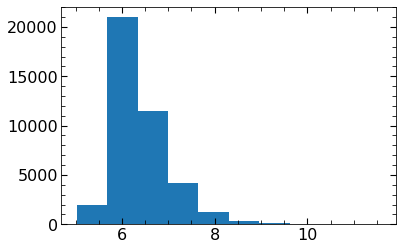

In [10]:
plt.hist(np.log10(sub_not_sat.dark['mass']))

(array([5., 9., 5., 6., 4., 1., 6., 9., 2., 2.]),
 array([ 7.16226304,  7.48385374,  7.80544445,  8.12703515,  8.44862585,
         8.77021655,  9.09180725,  9.41339795,  9.73498865, 10.05657935,
        10.37817005]),
 <BarContainer object of 10 artists>)

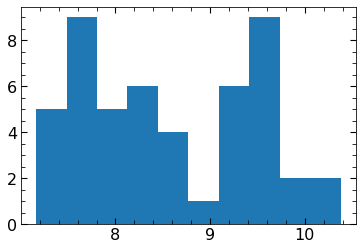

In [11]:
plt.hist(np.log10(sub_not_sat.star['mass']))

In [ ]:
m12i_op_disp = np.zeros(100)
m12i_op_mean = np.zeros(100)
for k in range(300, 310):
    sub_not_sat = m12i.subhalos(k)
    print(k)
    dsub = np.sqrt(np.sum(np.array(sub_not_sat.dark['pos'])**2, axis=1))
    dcut = np.where((dsub<300) & (dsub>20))[0]
    print(np.shape(np.array(sub_not_sat.dark['pos'][dcut])))
    m12i_op_disp[k-300], m12i_op_mean[k-300] = orbital_pole_dispersion2(np.array(sub_not_sat.dark['pos'])[dcut], 
                                                                       np.array(sub_not_sat.dark['vel'])[dcut])
    print('--')


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864

* read 45542 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 45542 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

N satellites = 58

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt

* read 17859917 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/tree.hdf5

-> Number of satellite subhalos at peak mass identified by halo finder 176 at snapshot 300
-> Total number of subhalos at snap 38483
-> Removing satellite subhalos
163 163
45

In [12]:
m12i_op_mean

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
m12c_data = np.loadtxt('../scripts/src/m12c_op_analysis_mass1e7.txt')
m12f_data = np.loadtxt('../scripts/src/m12f_op_analysis_mass1e7.txt')

(70.0, 100.0)

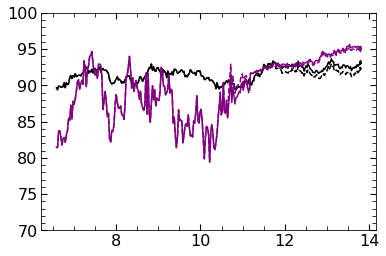

In [9]:
plt.plot(m12c_data[:,0], m12c_data[:,1], c='k')
plt.plot(m12c_data[:,0], m12c_data[:,2], c='k', ls='--')
plt.plot(m12c_data[:,0], m12c_data[:,3], c='purple')
plt.plot(m12c_data[:,0], m12c_data[:,4], c='purple', ls='--')
plt.ylim(70, 100)

(60.0, 100.0)

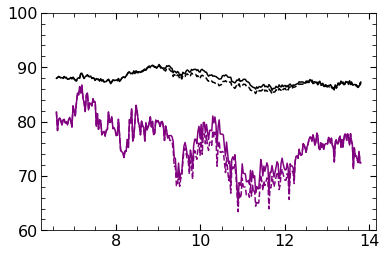

In [12]:
plt.plot(m12f_data[:,0], m12f_data[:,1], c='k')
plt.plot(m12f_data[:,0], m12f_data[:,2], c='k', ls='--')
plt.plot(m12f_data[:,0], m12f_data[:,3], c='purple')
plt.plot(m12f_data[:,0], m12f_data[:,4], c='purple', ls='--')
plt.ylim(60, 100)

In [13]:
m12i_op_disp = np.loadtxt('../scripts/src/m12i_op_analysis_mass1e8.txt')
m12b_op_disp = np.loadtxt('../scripts/src/m12b_op_analysis_mass1e8.txt')
m12c_op_disp = np.loadtxt('../scripts/src/m12c_op_analysis_mass1e8.txt')
m12r_op_disp = np.loadtxt('../scripts/src/m12r_op_analysis_mass1e8.txt')
m12w_op_disp = np.loadtxt('../scripts/src/m12w_op_analysis_mass1e8.txt')
m12f_op_disp = np.loadtxt('../scripts/src/m12f_op_analysis_mass1e8.txt')
m12m_op_disp = np.loadtxt('../scripts/src/m12m_op_analysis_mass1e8.txt')


ERROR! Session/line number was not unique in database. History logging moved to new session 920


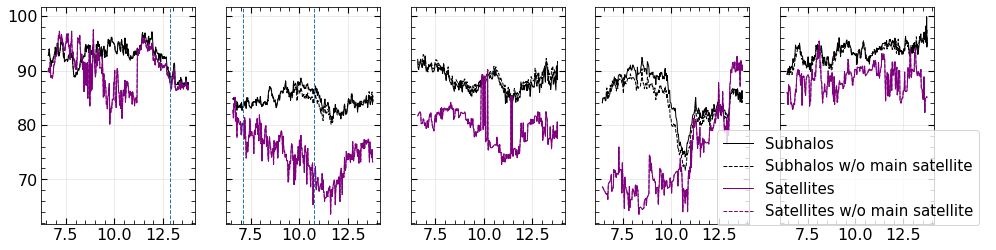

In [16]:
fig, ax = plt.subplots(1, 5, figsize=(16, 4), sharey=True)

#ax[0].plot(m12b_op_disp[:,0], m12b_op_disp[:,1], lw=1, c='k')
#ax[0].plot(m12b_op_disp[:,0], m12b_op_disp[:,2], lw=1, c='k', ls='--')

#ax[0].plot(m12b_op_disp[:,0], m12b_op_disp[:,3], lw=1, c='purple')
#ax[0].plot(m12b_op_disp[:,0], m12b_op_disp[:,4], lw=1, c='purple', ls='--')

#ax[0].axhline(77.81, lw=1.5, c='k', ls=':', alpha=0.9, label='MW satellites')
#ax[1].axhline(77.81, lw=1.5, c='k', ls=':', alpha=0.9)
#ax[2].axhline(77.81, lw=1.5, c='k', ls=':', alpha=0.9)
#ax[3].axhline(77.81, lw=1.5, c='k', ls=':', alpha=0.9)

#ax[1][0].axhline(77.81, lw=1.5, c='k', ls=':', alpha=0.9)
#ax[1][1].axhline(77.81, lw=1.5, c='k', ls=':', alpha=0.9)
#ax[1][2].axhline(77.81, lw=1.5, c='k', ls=':', alpha=0.9)


ax[0].plot(m12c_op_disp[:,0], m12c_op_disp[:,1], lw=1, c='k')
ax[0].plot(m12c_op_disp[:,0], m12c_op_disp[:,2], lw=1, c='k', ls='--')

ax[0].plot(m12c_op_disp[:,0], m12c_op_disp[:,3], lw=1, c='purple')
ax[0].plot(m12c_op_disp[:,0], m12c_op_disp[:,4], lw=1, c='purple', ls='--')

ax[1].plot(m12f_op_disp[:,0], m12f_op_disp[:,1], lw=1, c='k')
ax[1].plot(m12f_op_disp[:,0], m12f_op_disp[:,2], lw=1, c='k', ls='--')

ax[1].plot(m12f_op_disp[:,0], m12f_op_disp[:,3], lw=1, c='purple')
ax[1].plot(m12f_op_disp[:,0], m12f_op_disp[:,4], lw=1, c='purple', ls='--')


#ax[0][3].plot(m12i_op_disp[:,0], m12i_op_disp[:,1], lw=1, c='k')
#ax[0][3].plot(m12i_op_disp[:,0], m12i_op_disp[:,2], lw=1, c='k', ls='--')

#ax[0][3].plot(m12i_op_disp[:,0], m12i_op_disp[:,3], lw=1, c='purple')
#ax[0][3].plot(m12i_op_disp[:,0], m12i_op_disp[:,4], lw=1, c='purple', ls='--')


ax[2].plot(m12m_op_disp[:,0], m12m_op_disp[:,1], lw=1, c='k')
ax[2].plot(m12m_op_disp[:,0], m12m_op_disp[:,2], lw=1, c='k', ls='--')

ax[2].plot(m12m_op_disp[:,0], m12m_op_disp[:,3], lw=1, c='purple')
ax[2].plot(m12m_op_disp[:,0], m12m_op_disp[:,4], lw=1, c='purple', ls='--')

ax[3].plot(m12r_op_disp[:,0], m12r_op_disp[:,1], lw=1, c='k')
ax[3].plot(m12r_op_disp[:,0], m12r_op_disp[:,2], lw=1, c='k', ls='--')

ax[3].plot(m12r_op_disp[:,0], m12r_op_disp[:,3], lw=1, c='purple')
ax[3].plot(m12r_op_disp[:,0], m12r_op_disp[:,4], lw=1, c='purple', ls='--')

ax[4].plot(m12w_op_disp[:,0], m12w_op_disp[:,1], lw=1, c='k', label='Subhalos')
ax[4].plot(m12w_op_disp[:,0], m12w_op_disp[:,2], lw=1, c='k', ls='--', label='Subhalos w/o main satellite')

ax[4].plot(m12w_op_disp[:,0], m12w_op_disp[:,3], lw=1, c='purple', label='Satellites')
ax[4].plot(m12w_op_disp[:,0], m12w_op_disp[:,4], lw=1, c='purple', ls='--', label='Satellites w/o main satellite')


for i in range(5):
    ax[i].grid(alpha=0.3)

        
#ax[00].axvline(m12b_t[385], ls='--',lw=1)

ax[0].axvline(m12b_t[549], ls='--',lw=1)

ax[1].axvline(m12b_t[462], ls='--', lw=1)
ax[1].axvline(m12b_t[320], ls='--', lw=1)

#ax[2].axvline(m12r_t[477], ls='--',lw=1)
#ax[1][1].axvline(m12r_t[515], ls='-.',lw=1)

#ax[1][1].axvline(m12r_t[560], ls='--',lw=1)

#ax[1][0].axvline(m12m_t[444], ls='--',lw=1)
#ax[1][0].axvline(m12m_t[558], ls='--',lw=1)

#ax[1][2].axvline(m12w_t[490], ls='--',lw=1)
#ax[1][2].axvline(m12w_t[358], ls='--',lw=1)
#ax[1][2].axvline(m12w_t[311], ls='--',lw=1)
        
#fig.delaxes(ax[1][3])

#ax[0][0].set_title(r'$\rm{m12b}$', fontsize=16)
#ax[0][1].set_title(r'$\rm{m12c}$', fontsize=16)
#ax[0][2].set_title(r'$\rm{m12f}$', fontsize=16)
#ax[0][3].set_title(r'$\rm{m12i}$', fontsize=16)

#ax[1][0].set_title(r'$\rm{m12m}$', fontsize=16)
#ax[1][1].set_title(r'$\rm{m12r}$', fontsize=16)
#ax[1][2].set_title(r'$\rm{m12w}$', fontsize=16)
#ax[1][3].set_title(r'$\rm{LMC\ simulation}$', fontsize=16)

#ax[0][3].set_xlabel('Time [Gyrs]')
#ax[1][0].set_xlabel('Time [Gyrs]')
#ax[1][1].set_xlabel('Time [Gyrs]')
#ax[1][2].set_xlabel('Time [Gyrs]')        

#ax[0][0].set_ylabel('Orbital dispersion')
#ax[1][0].set_ylabel('Orbital dispersion')

fig.legend(fontsize=15, loc=(0.72, 0.1))
#plt.savefig('OP_disp_outer_halo.png', bbox_inches='tight')
#plt.savefig('OP_disp_outer_halo.pdf', bbox_inches='tight')

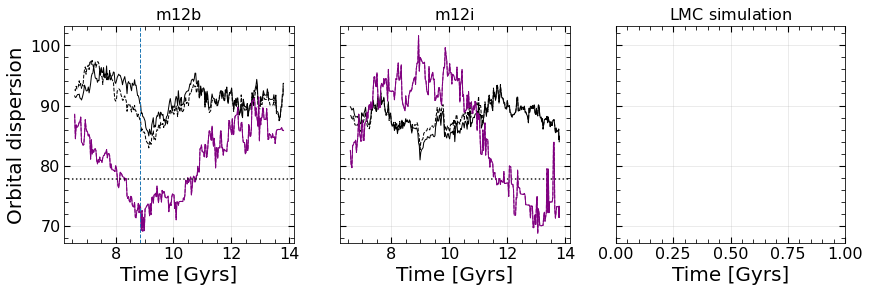

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

ax[0].plot(m12b_op_disp[:,0], m12b_op_disp[:,1], lw=1, c='k')
ax[0].plot(m12b_op_disp[:,0], m12b_op_disp[:,2], lw=1, c='k', ls='--')

ax[0].plot(m12b_op_disp[:,0], m12b_op_disp[:,3], lw=1, c='purple')
ax[0].plot(m12b_op_disp[:,0], m12b_op_disp[:,4], lw=1, c='purple', ls='--')

ax[0].axhline(77.81, lw=1.5, c='k', ls=':', alpha=0.9, label='MW satellites')
ax[1].axhline(77.81, lw=1.5, c='k', ls=':', alpha=0.9)


ax[1].plot(m12i_op_disp[:,0], m12i_op_disp[:,1], lw=1, c='k')
ax[1].plot(m12i_op_disp[:,0], m12i_op_disp[:,2], lw=1, c='k', ls='--')
ax[1].plot(m12i_op_disp[:,0], m12i_op_disp[:,3], lw=1, c='purple')
ax[1].plot(m12i_op_disp[:,0], m12i_op_disp[:,4], lw=1, c='purple', ls='--')

ax[0].grid(alpha=0.3)
ax[1].grid(alpha=0.3)
ax[2].grid(alpha=0.3)

        
ax[0].axvline(m12b_t[385], ls='--',lw=1)


ax[0].set_title(r'$\rm{m12b}$', fontsize=16)
ax[1].set_title(r'$\rm{m12i}$', fontsize=16)
ax[2].set_title(r'$\rm{LMC\ simulation}$', fontsize=16)

ax[0].set_xlabel('Time [Gyrs]')
ax[1].set_xlabel('Time [Gyrs]')
ax[2].set_xlabel('Time [Gyrs]')

ax[0].set_ylabel('Orbital dispersion')

plt.savefig('OP_main_disp_outer_halo.png', bbox_inches='tight')
plt.savefig('OP_main_disp_outer_halo.pdf', bbox_inches='tight')

In [3]:
m12b_op_vmean = np.loadtxt('../scripts/src/m12b_op_median_vel_mass1e8.txt')
m12c_op_vmean = np.loadtxt('../scripts/src/m12c_op_median_vel_mass1e8.txt')
m12i_op_vmean = np.loadtxt('../scripts/src/m12i_op_median_vel_mass1e8.txt')
m12f_op_vmean = np.loadtxt('../scripts/src/m12f_op_median_vel_mass1e8.txt')
m12m_op_vmean = np.loadtxt('../scripts/src/m12m_op_median_vel_mass1e8.txt')
m12r_op_vmean = np.loadtxt('../scripts/src/m12r_op_median_vel_mass1e8.txt')
m12w_op_vmean = np.loadtxt('../scripts/src/m12w_op_median_vel_mass1e8.txt')



In [88]:
m12b_op_vmean_st = np.loadtxt('../scripts/src/m12b_op_median_vel_stellar_mass1e8.txt')
#m12c_op_vmean_st = np.loadtxt('../scripts/src/m12c_op_median_vel_stellar_mass1e8.txt')
#m12i_op_vmean_st = np.loadtxt('../scripts/src/m12i_op_median_vel_stellar_mass1e8.txt')
#m12f_op_vmean_st = np.loadtxt('../scripts/src/m12f_op_median_vel_stellar_mass1e8.txt')
#m12m_op_vmean_st = np.loadtxt('../scripts/src/m12m_op_median_vel_stellar_mass1e8.txt')
#m12r_op_vmean_st = np.loadtxt('../scripts/src/m12r_op_median_vel_stellar_mass1e8.txt')
#m12w_op_vmean_st = np.loadtxt('../scripts/src/m12w_op_median_vel_stellar_mass1e8.txt')


In [76]:
m12b_op_mean = np.loadtxt('../scripts/src/m12b_op_median_pos_mass1e8.txt')

In [77]:
np.shape(m12b_op_mean)

(300, 7)

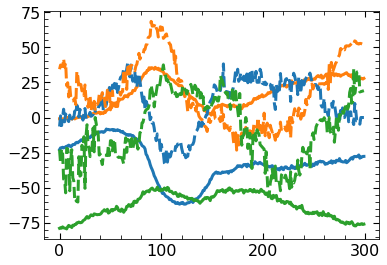

In [82]:
plt.plot(m12b_op_mean[:,1])
plt.plot(m12b_op_mean[:,2])
plt.plot(m12b_op_mean[:,3])

plt.plot(m12b_op_mean[:,4], c='C0', ls='--')
plt.plot(m12b_op_mean[:,5], c='C1', ls='--')
plt.plot(m12b_op_mean[:,6], c='C2', ls='--')

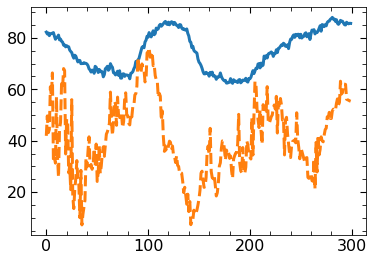

In [83]:
plt.plot(norm(m12b_op_mean[:,1:4], axis=1))
plt.plot(norm(m12b_op_mean[:,4:8], axis=1), ls='--')

In [4]:
# MWLMC5 orbit

vel_mw_lmc5 = np.loadtxt('../../../gadget_runs/orbits/MWLMC5_100M_b0_MO3_host_orbit_pos.txt')

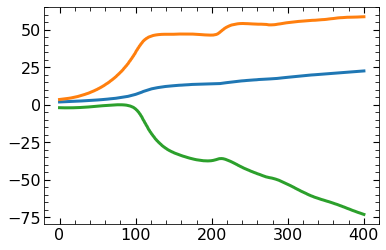

In [5]:
plt.plot(vel_mw_lmc5[:,0])
plt.plot(vel_mw_lmc5[:,1])
plt.plot(vel_mw_lmc5[:,2])

In [7]:
m12b_t, m12b_vel, m12b_3dv = host_velocities('m12b')
m12c_t, m12c_vel, m12c_3dv = host_velocities('m12c')
m12f_t, m12f_vel, m12f_3dv = host_velocities('m12f')
m12i_t, m12i_vel, m12i_3dv = host_velocities('m12i')
m12m_t, m12m_vel, m12m_3dv = host_velocities('m12m')
m12r_t, m12r_vel, m12r_3dv = host_velocities('m12r')
m12w_t, m12w_vel, m12w_3dv = host_velocities('m12w')

NameError: name 'm12c_t' is not defined

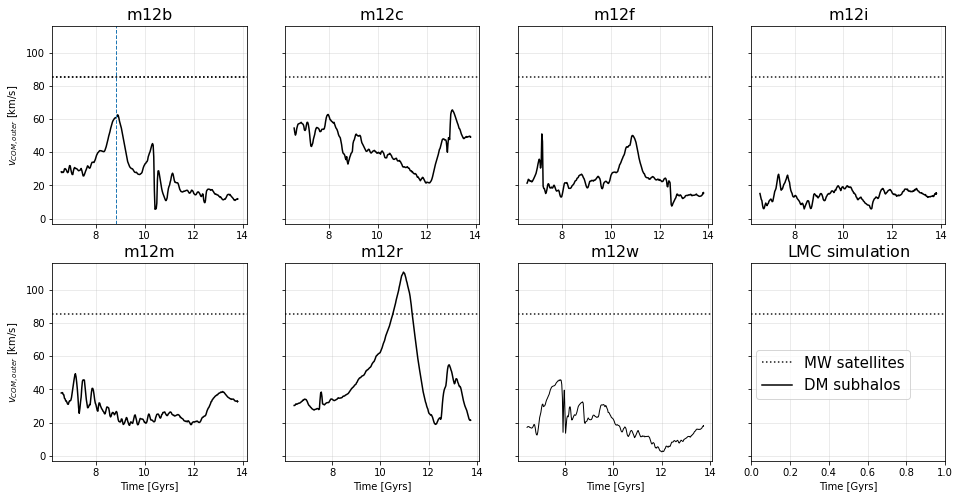

In [10]:
fig, ax = plt.subplots(2, 4, figsize=(16, 8), sharey=True)

mw_travel = np.sqrt(8.8*2 + 37**2 + 77**2)

ax[0][0].plot(m12b_op_vmean[:,0], np.sqrt(np.sum(m12b_op_vmean[:,1:4]**2, axis=1)), lw=1.5, c='k')
#ax[0][0].plot(m12b_op_vmean[:,0], m12b_op_vmean[:,2], lw=1.5)
#ax[0][0].plot(m12b_op_vmean[:,0], m12b_op_vmean[:,3], lw=1.5)

ax[0][1].plot(m12c_op_vmean[:,0], np.sqrt(np.sum(m12c_op_vmean[:,1:4]**2, axis=1)), lw=1.5, c='k')
#ax[0][1].plot(m12c_op_vmean[:,0], m12c_op_vmean[:,2], lw=1.5)
#ax[0][1].plot(m12c_op_vmean[:,0], m12c_op_vmean[:,3], lw=1.5)

#ax[0][1].plot(m12c_op_vmean_st[:,0], np.sqrt(np.sum(m12c_op_vmean_st[:,1:4]**2, axis=1)), lw=1.5, ls='--', c='purple')
#ax[0][1].plot(m12c_op_vmean_st[:,0], m12c_op_vmean_st[:,2], lw=1.5, ls='--', c='C1')
#ax[0][1].plot(m12c_op_vmean_st[:,0], m12c_op_vmean_st[:,3], lw=1.5, ls='--', c='C2')


ax[0][2].plot(m12f_op_vmean[:,0], np.sqrt(np.sum(m12f_op_vmean[:,1:4]**2, axis=1)), lw=1.5, c='k')


ax[0][3].plot(m12i_op_vmean[:,0], np.sqrt(np.sum(m12i_op_vmean[:,1:4]**2, axis=1)), lw=1.5, c='k', label='DM subhalos')
#ax[0][2].plot(m12i_op_vmean[:,0], m12i_op_vmean[:,2], lw=1.5)
#ax[0][2].plot(m12i_op_vmean[:,0], m12i_op_vmean[:,3], lw=1.5)

#ax[0][3].plot(m12i_op_vmean_st[:,0], np.sqrt(np.sum(m12i_op_vmean_st[:,1:4]**2, axis=1)), lw=1.5, ls='--', c='purple', label='Satellites')
#ax[0][2].plot(m12i_op_vmean_st[:,0], m12i_op_vmean_st[:,2], lw=1.5, ls='--', c='C1')
#ax[0][2].plot(m12i_op_vmean_st[:,0], m12i_op_vmean_st[:,3], lw=1.5, ls='--', c='C2')



ax[1][0].plot(m12m_op_vmean[:,0], np.sqrt(np.sum(m12m_op_vmean[:,1:4]**2, axis=1)), lw=1.5, c='k')
#ax[1][0].plot(m12m_op_vmean[:,0], m12m_op_vmean[:,2], lw=1.5)
#ax[1][0].plot(m12m_op_vmean[:,0], m12m_op_vmean[:,3], lw=1.5)


ax[1][1].plot(m12r_op_vmean[:,0], np.sqrt(np.sum(m12r_op_vmean[:,1:4]**2, axis=1)), lw=1.5, c='k')
#ax[1][1].plot(m12r_op_vmean[:,0], m12r_op_vmean[:,2], lw=1.5)
#ax[1][1].plot(m12r_op_vmean[:,0], m12r_op_vmean[:,3], lw=1.5)

#ax[1][1].plot(m12r_op_vmean_st[:,0], np.sqrt(np.sum(m12r_op_vmean_st[:,1:4]**2, axis=1)), lw=1.5, ls='--', c='purple')
#ax[1][1].plot(m12r_op_vmean_st[:,0], m12r_op_vmean_st[:,2], lw=1.5, ls='--', c='C1')
#ax[1][1].plot(m12r_op_vmean_st[:,0], m12r_op_vmean_st[:,3], lw=1.5, ls='--', c='C2')


ax[1][2].plot(m12w_op_vmean[:,0], np.sqrt(np.sum(m12w_op_vmean[:,1:4]**2, axis=1)), lw=1, c='k')
#ax[1][2].plot(m12w_op_vmean[:,0], m12w_op_vmean[:,2], lw=1)
#ax[1][2].plot(m12w_op_vmean[:,0], m12w_op_vmean[:,3], lw=1)

#ax[1][2].plot(m12w_op_vmean_st[:,0], np.sqrt(np.sum(m12w_op_vmean_st[:,1:4]**2, axis=1)), lw=1.5, ls='--', c='purple')
#ax[1][2].plot(m12w_op_vmean_st[:,0], m12w_op_vmean_st[:,2], lw=1.5, ls='--', c='C1')
#ax[1][2].plot(m12w_op_vmean_st[:,0], m12w_op_vmean_st[:,3], lw=1.5, ls='--', c='C2')

#ax[1][3].plot(np.arange(0, 401, 1)*0.02, vel_mw_lmc5[:,0], lw=1.5)
#ax[1][3].plot(np.arange(0, 401, 1)*0.02, vel_mw_lmc5[:,1], lw=1.5)
#ax[1][3].plot(np.arange(0, 401, 1)*0.02, vel_mw_lmc5[:,2], lw=1.5)




ax[0][0].axhline(mw_travel, ls=':', c='k', alpha=0.9, lw=1.5, label='MW satellites')

for i in range(2):
    for j in range(4):
        ax[i][j].axhline(mw_travel, ls=':', c='k', alpha=0.9, lw=1.5)
        ax[i][j].grid(alpha=0.3)

#        ax[i][j].axhline(8.8, c='C0', lw=1)
#        ax[i][j].axhline(-37, c='C1', lw=1)
#        ax[i][j].axhline(77, c='C2', lw=1)
#ax[0][3].legend(fontsize=15)

fig.legend(fontsize=15, loc=(0.78, 0.2))


ax[0][0].set_title(r'$\rm{m12b}$', fontsize=16)
ax[0][1].set_title(r'$\rm{m12c}$', fontsize=16)
ax[0][2].set_title(r'$\rm{m12f}$', fontsize=16)
ax[0][3].set_title(r'$\rm{m12i}$', fontsize=16)

ax[1][0].set_title(r'$\rm{m12m}$', fontsize=16)
ax[1][1].set_title(r'$\rm{m12r}$', fontsize=16)
ax[1][2].set_title(r'$\rm{m12w}$', fontsize=16)
ax[1][3].set_title(r'$\rm{LMC\ simulation}$', fontsize=16)

ax[1][0].set_xlabel('Time [Gyrs]')
ax[1][1].set_xlabel('Time [Gyrs]')
ax[1][2].set_xlabel('Time [Gyrs]')
ax[1][3].set_xlabel('Time [Gyrs]')

ax[0][0].set_ylabel('$v_{COM, outer}$ [km/s]')
ax[1][0].set_ylabel('$v_{COM, outer}$ [km/s]')


ax[0][0].axvline(m12b_t[385], ls='--',lw=1)

ax[0][1].axvline(m12c_t[549], ls='--',lw=1)

ax[0][2].axvline(m12f_t[462], ls='--', lw=1)
ax[0][2].axvline(m12f_t[320], ls='--', lw=1)

ax[1][1].axvline(m12r_t[477], ls='--',lw=1)
ax[1][1].axvline(m12r_t[515], ls='-.',lw=1)

ax[1][1].axvline(m12r_t[560], ls='--',lw=1)

ax[1][0].axvline(m12m_t[444], ls='--',lw=1)
ax[1][0].axvline(m12m_t[558], ls='--',lw=1)

ax[1][2].axvline(m12w_t[490], ls='--',lw=1)
ax[1][2].axvline(m12w_t[358], ls='--',lw=1)
ax[1][2].axvline(m12w_t[311], ls='--',lw=1)



fig.delaxes(ax[1][3])


#plt.savefig('vCOM_motion_outer_halo.png', bbox_inches='tight')
#plt.savefig('vCOM_motion_outer_halo.pdf', bbox_inches='tight')

In [12]:
disk_halo_vel6 = np.loadtxt('../data/orbits/MWLMC6_100M_b0_MO3_host_disk_outer_orbit_pos.txt')
disk_halo_pos6 = np.loadtxt('../data/orbits/MWLMC6_100M_b0_MO3_host_disk_outer_orbit_vel.txt')

disk_halo_vel5 = np.loadtxt('../data/orbits/MWLMC5_100M_b0_MO3_host_disk_outer_orbit_pos.txt')
disk_halo_pos5 = np.loadtxt('../data/orbits/MWLMC5_100M_b0_MO3_host_disk_outer_orbit_vel.txt')

disk_halo_vel4 = np.loadtxt('../data/orbits/MWLMC4_100M_b0_MO3_host_disk_outer_orbit_pos.txt')
disk_halo_pos4 = np.loadtxt('../data/orbits/MWLMC4_100M_b0_MO3_host_disk_outer_orbit_vel.txt')

disk_halo_vel3 = np.loadtxt('../data/orbits/MWLMC3_100M_b0_MO3_host_disk_outer_orbit_pos.txt')
disk_halo_pos3 = np.loadtxt('../data/orbits/MWLMC3_100M_b0_MO3_host_disk_outer_orbit_vel.txt')

In [64]:
tsim = np.arange(0, 8.02, 0.02)

In [65]:
tsim[116]

2.32

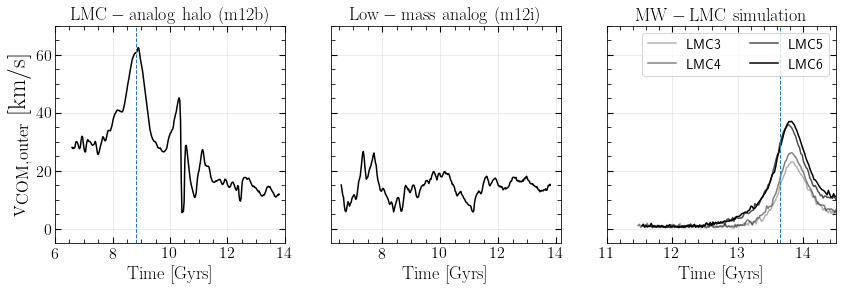

In [75]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4), sharey=True)

#mw_travel = np.sqrt(8.8*2 + 37**2 + 77**2)

ax[0].plot(m12b_op_vmean[:,0], np.sqrt(np.sum((m12b_op_vmean[:,1:4])**2, axis=1)), lw=1.5, c='k')
#ax[0].plot(m12b_op_vmean_st[:,0], np.sqrt(np.sum(m12b_op_vmean_st[:,1:4]**2, axis=1)), lw=1.5, ls='--',  c='purple')
ax[1].plot(m12i_op_vmean[:,0], np.sqrt(np.sum(m12i_op_vmean[:,1:4]**2, axis=1)), lw=1.5, c='k')
#ax[1].plot(m12i_op_vmean_st[:,0], np.sqrt(np.sum(m12i_op_vmean_st[:,1:4]**2, axis=1)), lw=1.5, ls='--', c='purple', label='Satellites')



ax[2].plot(tsim-tsim[91]+13.8, np.sqrt(np.sum(disk_halo_pos3**2, axis=1)[:401]), c='k', alpha=0.3, label='LMC3')

ax[2].plot(tsim-tsim[116]+13.8, np.sqrt(np.sum(disk_halo_pos4**2, axis=1)[:401]), c='k', alpha=0.5, label='LMC4')
ax[2].plot(tsim-tsim[111]+13.8, np.sqrt(np.sum(disk_halo_pos5**2, axis=1)[:401]), c='k', alpha=0.7, label='LMC5')
ax[2].plot(tsim-tsim[113]+13.8, np.sqrt(np.sum(disk_halo_pos6**2, axis=1)[:401]), c='k', alpha=1.0, label='LMC6')


#ax[i][j].axhline(mw_travel, ls=':', c='k', alpha=0.9, lw=1.5)
ax[0].grid(alpha=0.3)
ax[1].grid(alpha=0.3)
ax[2].grid(alpha=0.3)


#        ax[i][j].axhline(8.8, c='C0', lw=1)
#        ax[i][j].axhline(-37, c='C1', lw=1)
#        ax[i][j].axhline(77, c='C2', lw=1)
#ax[0][3].legend(fontsize=15)

#ax[0].legend(fontsize=14)
#ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14, ncol=2)

ax[0].set_title(r'$\rm{LMC-analog\ halo\ (m12b)}$', fontsize=18)
ax[1].set_title(r'$\rm{Low-mass\ analog\ (m12i)}$', fontsize=18)
ax[2].set_title(r'$\rm{MW-LMC\ simulation}$', fontsize=18)

ax[0].set_xlabel(r'$\rm{Time\ [Gyrs]}$', fontsize=18)
ax[1].set_xlabel(r'$\rm{Time\ [Gyrs]}$', fontsize=18)
ax[2].set_xlabel(r'$\rm{Time\ [Gyrs]}$', fontsize=18)

ax[0].set_ylabel(r'$\rm{v_{COM, outer}\ [km/s]}$', fontsize=24)
ax[0].axvline(m12b_t[385], ls='--',lw=1)
ax[2].axvline(13.65, ls='--',lw=1)


ax[0].set_ylim(-5, 70)
ax[0].set_xlim(6, 14)
ax[2].set_xlim(11, 14.5)



plt.savefig('vCOM_main_motion_outer_halo.png', bbox_inches='tight')
plt.savefig('vCOM_main_motion_outer_halo.pdf', bbox_inches='tight')

In [ ]:
# To-do median op plots. 

45.0

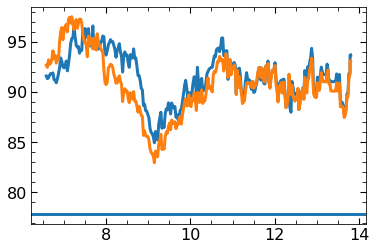

In [55]:
plt.plot(m12b_op_disp[:,0], m12b_op_disp[:,1])
plt.plot(m12b_op_disp[:,0], m12b_op_disp[:,2])
#plt.plot(m12b_op_disp[:,0], m12b_op_disp[:,3])
#plt.plot(m12b_op_disp[:,0], m12b_op_disp[:,4])
plt.axhline(77.81)

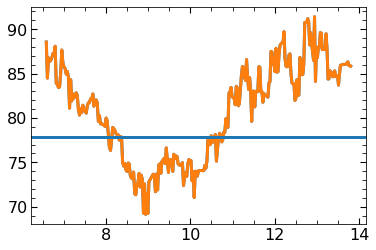

In [56]:
plt.plot(m12b_op_disp[:,0], m12b_op_disp[:,3])
plt.plot(m12b_op_disp[:,0], m12b_op_disp[:,4])
plt.axhline(77.81)

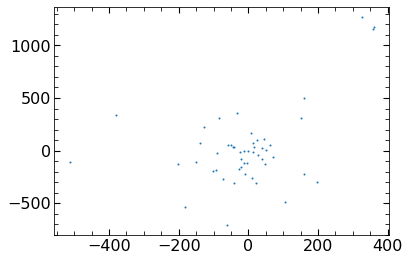

In [75]:
plt.scatter(tesT_sub.star['pos'][:,0], tesT_sub.star['pos'][:,1], s=1) 

In [59]:
k=0

m12b_x_mean = np.zeros(16)
m12b_vx_mean = np.zeros(16)
m12b_vx_median = np.zeros(16)
m12b_vx_std = np.zeros(16)

m12b_y_mean = np.zeros(16)
m12b_vy_mean = np.zeros(16)
m12b_vy_median = np.zeros(16)
m12b_vy_std = np.zeros(16)

m12b_z_mean = np.zeros(16)
m12b_vz_mean = np.zeros(16)
m12b_vz_median = np.zeros(16)
m12b_vz_std = np.zeros(16)

for i in range(300, 600, 20):
    m12b_subhalos_300 = halo.io.IO.read_catalogs('snapshot', i, sim_directory)
    satellites = m12b_subhalos_300['star.mass']
    print(len(satellites))
    dsat = norm(m12b_subhalos_300['host.distance'], axis=1)
    sat = np.where((satellites>0) & (dsat>20) & (dsat<400))[0]
    print(len(sat))
    m12b_vx_mean[k] = np.mean(m12b_subhalos_300['host.velocity'][sat][:,0])
    m12b_x_mean[k] = np.median(m12b_subhalos_300['host.distance'][sat][:,0])
    m12b_y_mean[k] = np.median(m12b_subhalos_300['host.distance'][sat][:,1])
    m12b_z_mean[k] = np.median(m12b_subhalos_300['host.distance'][sat][:,2])

    m12b_vx_median[k] = np.median(m12b_subhalos_300['host.velocity'][sat][:,0])
    m12b_vx_std[k] = np.std(m12b_subhalos_300['host.velocity'][sat][:,0])
    
    m12b_vy_mean[k] = np.mean(m12b_subhalos_300['host.velocity'][sat][:,1])
    m12b_vy_median[k] = np.median(m12b_subhalos_300['host.velocity'][sat][:,1])
    m12b_vy_std[k] = np.std(m12b_subhalos_300['host.velocity'][sat][:,1])
    
    
    m12b_vz_mean[k] = np.mean(m12b_subhalos_300['host.velocity'][sat][:,2])
    m12b_vz_median[k] = np.median(m12b_subhalos_300['host.velocity'][sat][:,2])
    m12b_vz_std[k] = np.std(m12b_subhalos_300['host.velocity'][sat][:,2])
    
    k+=1


# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt

  using snapshot index = 300, redshift = 0.864

* read 45542 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/halo_300.hdf5

# in halo_analysis.halo_io.Particle():
* read 45542 halos, 58 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/star_300.hdf5
* assigning primary host and coordinates wrt it to halo catalog...  finished

45542
40

# in utilities.simulation.Snapshot():
* reading:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/snapshot_times.txt

  using snapshot index = 320, redshift = 0.759

* read 44300 halos from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i_res7100/halo/rockstar_dm/catalog_hdf5/halo_320.hdf5

# in halo_analysis.halo_io.Particle():
* read 44300 halos, 55 have star particles, from:  mnt/ceph/users/firesims/fire2/metaldiff/m12i

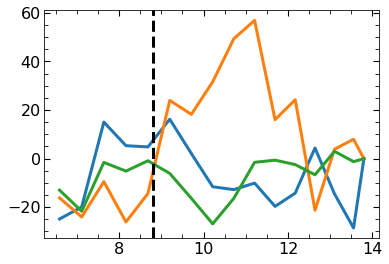

In [60]:
plt.plot(times[np.arange(300, 601, 20)], m12b_vx_median)
plt.plot(times[np.arange(300, 601, 20)], m12b_vy_median)
plt.plot(times[np.arange(300, 601, 20)], m12b_vz_median)
plt.axvline(times[385], c='k', ls='--')

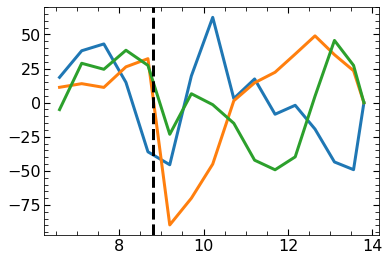

In [52]:
plt.plot(times[np.arange(300, 601, 20)], m12b_vx_median)
plt.plot(times[np.arange(300, 601, 20)], m12b_vy_median)
plt.plot(times[np.arange(300, 601, 20)], m12b_vz_median)
plt.axvline(times[385], c='k', ls='--')

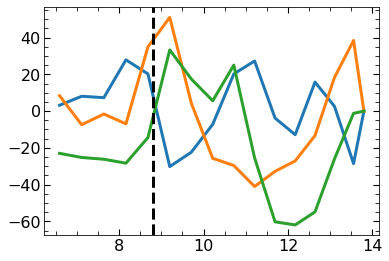

In [56]:
plt.plot(times[np.arange(300, 601, 20)], m12b_x_mean)
plt.plot(times[np.arange(300, 601, 20)], m12b_y_mean)
plt.plot(times[np.arange(300, 601, 20)], m12b_z_mean)
plt.axvline(times[385], c='k', ls='--')

(array([ 2.,  2.,  1.,  8., 10., 19., 14., 19., 15.,  6.]),
 array([-149.16134644, -119.04367065,  -88.9260025 ,  -58.80832672,
         -28.69065475,    1.42701721,   31.54468918,   61.66236115,
          91.78003693,  121.89770508,  152.01538086]),
 <BarContainer object of 10 artists>)

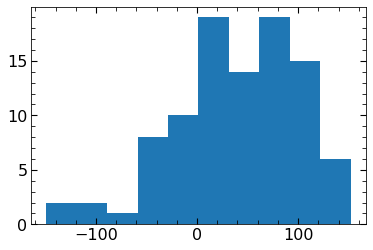

In [23]:
plt.hist(m12b_subhalos_300['host.velocity'][sat][:,0])

In [ ]:
## re-do this with rot_matrix fixed ! 
## compute orbital poles